In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'/Users/gangashaji/Downloads/iris-2.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.shape

(150, 5)

In [5]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.describe(include=object)

,Classification
count,150
unique,3
top,Iris-setosa
freq,50


In [9]:
data.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# Filling Missing Values

In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Classification
Iris-setosa        Axes(0.125,0.11;0.775x0.77)
Iris-versicolor    Axes(0.125,0.11;0.775x0.77)
Iris-virginica     Axes(0.125,0.11;0.775x0.77)
dtype: object

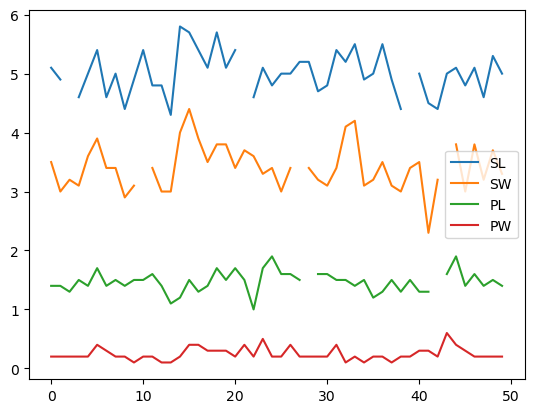

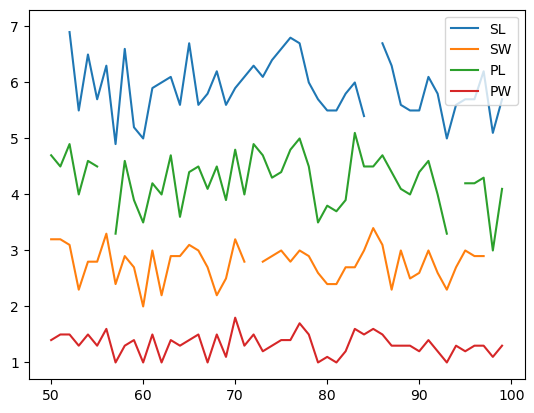

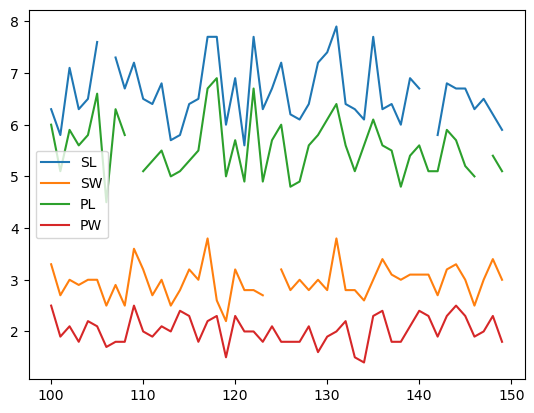

In [11]:
data.groupby('Classification').plot()

In [12]:
data.groupby('Classification').mean()

,SL,SW,PL,PW
Classification,,,,
Iris-setosa,5.008511,3.408511,1.468750,0.244
Iris-versicolor,5.925000,2.781250,4.252083,1.326
Iris-virginica,6.616667,2.967347,5.547917,2.026


In [13]:
for i in ['SL','SW','PL']:
    data[i]=data[i].groupby(data['Classification']).fillna(data[i].mean())

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Handling Outliers

<Axes: >

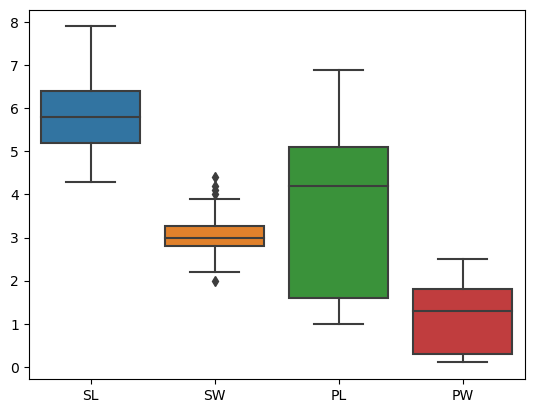

In [15]:
sns.boxplot(data[['SL','SW','PL','PW']])

No significant outliers to be removed
No encoding required

# Logistic Regression

In [16]:
x=data.drop('Classification',axis=1)

In [17]:
y=data['Classification']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial', solver ='lbfgs')
model=lr.fit(x_train,y_train)

In [21]:
y_predictions=model.predict(x_test)

In [22]:
y_predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [23]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Classification, dtype: object

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [25]:
confusion_matrix(y_test,y_predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [26]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))

Accuracy= 1.0
Precision= 1.0
recall_score= 1.0
f1_score= 1.0


# K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
metric_k=[]
neighbors=np.arange(3,15)

In [29]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [30]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

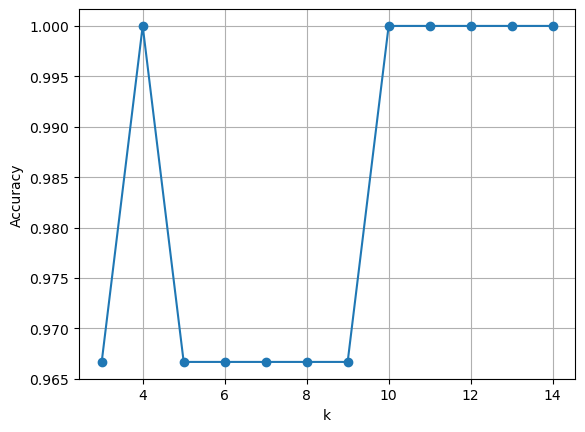

In [31]:
plt.plot(neighbors,metric_k,'o-')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.grid()

In [32]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)#max accuracy is for k=4,10,11,12,13,14

In [33]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 1.0
Precision= 1.0
recall_score= 1.0
f1_score= 1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# SVM

In [34]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [35]:
y_prediction=svmclf.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is',accuracy_score(y_test,y_prediction))

Accuracy is 1.0


In [37]:
confusion_matrix(y_test,y_prediction)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# Decision Trees

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred=dt_clf.predict(x_test)

In [40]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [41]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_predictions=rf_clf.predict(x_test)

In [44]:
print('Accuracy is',accuracy_score(y_test,y_predictions))

Accuracy is 1.0


In [45]:
confusion_matrix(y_test,y_predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])